In [108]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in CSV
df = pd.read_csv("training_data.csv")
df

,white_elo,black_elo,white_time_left,black_time_left,expected_loss,blunder_chance,move_time
0,1604.0,1609.0,180.0,180.0,25.33,0.01356,0.0
1,1604.0,1609.0,180.0,180.0,22.25,0.00810,0.1
2,1604.0,1609.0,180.0,179.9,22.98,0.01181,1.0
3,1604.0,1609.0,179.0,179.9,19.32,0.00270,0.3
4,1604.0,1609.0,179.0,179.6,21.64,0.00989,0.7
...,...,...,...,...,...,...,...
279233,1430.0,1419.0,30.2,119.0,36.25,0.04848,1.3
279234,1430.0,1419.0,28.9,119.0,24.76,0.00074,1.3
279235,1430.0,1419.0,28.9,117.7,34.47,0.04021,2.4
279236,1430.0,1419.0,26.5,117.7,29.81,0.00213,2.9


In [115]:
# Create the feature matrix and target variable as numpy arrays
feature_cols = ['white_time_left', 'black_time_left', 'expected_loss', 'blunder_chance']
target_col = ['move_time']
X = np.array(df_nooutliers[feature_cols])
y = np.array(df_nooutliers[target_col])

# # Split data into train and test 75/25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=561, 
                                                   test_size=0.25, 
                                                   shuffle=True)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# # Standardize the design matrix for train and test data
X_train /= np.sqrt(np.sum(X_train**2, axis=0))
X_test /= np.sqrt(np.sum(X_test**2, axis=0))
# If the data is not normalized, some features may have a greater influence on the model than others, simply because they have a larger range of values. 


### EDA

In [109]:
df.describe()

,white_elo,black_elo,white_time_left,black_time_left,expected_loss,blunder_chance,move_time
count,279238.000000,279238.000000,279238.000000,279238.000000,279238.000000,279238.000000,279238.000000
mean,1507.463665,1504.321446,119.722649,119.566544,30.783569,0.045135,3.171372
std,61.740202,59.682552,53.077283,53.431353,19.587202,0.088414,3.825157
min,1315.000000,1390.000000,0.100000,0.100000,12.330000,-0.062030,0.000000
25%,1461.000000,1454.000000,79.500000,79.600000,20.130000,0.005250,1.000000
50%,1510.000000,1508.000000,133.300000,133.100000,24.770000,0.014260,1.900000
75%,1556.000000,1555.000000,168.300000,168.500000,34.620000,0.049700,3.900000
max,1774.000000,1610.000000,180.000000,180.000000,209.550000,1.070120,102.700000


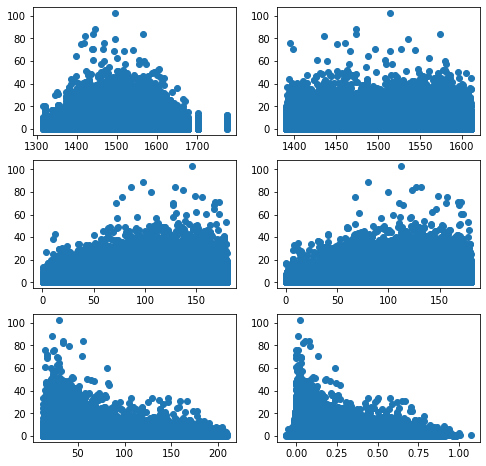

In [103]:
# Linearity: Create scatter plots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Plot the data on each subplot
axs[0, 0].scatter(df['white_elo'], df['move_time']) # almost no correlation between elo and move time.
axs[0, 1].scatter(df['black_elo'], df['move_time'])
axs[1, 0].scatter(df['white_time_left'], df['move_time']) # slight positive correlation (the more time left, the longer the move time.)
axs[1, 1].scatter(df['black_time_left'], df['move_time'])
axs[2, 0].scatter(df['expected_loss'], df['move_time']) # small negative correlation (higher expected loss correlates with shorter time.)
axs[2, 1].scatter(df['blunder_chance'], df['move_time'])

(array([2.65239e+05, 1.20140e+04, 1.56200e+03, 3.12000e+02, 8.00000e+01,
        1.40000e+01, 8.00000e+00, 5.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([  0.  ,  10.27,  20.54,  30.81,  41.08,  51.35,  61.62,  71.89,
         82.16,  92.43, 102.7 ]),
 <BarContainer object of 10 artists>)

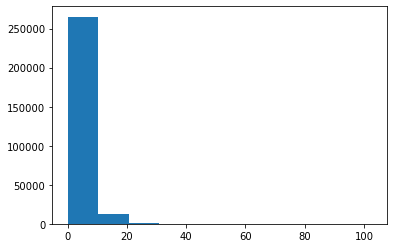

In [99]:
# Create a histogram of response.
plt.hist(df['move_time'])

In [111]:
# filter for move_time <= 4
df_nooutliers = df[df['move_time'] <= 4] # 75%
df_nooutliers

,white_elo,black_elo,white_time_left,black_time_left,expected_loss,blunder_chance,move_time
0,1604.0,1609.0,180.0,180.0,25.33,0.01356,0.0
1,1604.0,1609.0,180.0,180.0,22.25,0.00810,0.1
2,1604.0,1609.0,180.0,179.9,22.98,0.01181,1.0
3,1604.0,1609.0,179.0,179.9,19.32,0.00270,0.3
4,1604.0,1609.0,179.0,179.6,21.64,0.00989,0.7
...,...,...,...,...,...,...,...
279233,1430.0,1419.0,30.2,119.0,36.25,0.04848,1.3
279234,1430.0,1419.0,28.9,119.0,24.76,0.00074,1.3
279235,1430.0,1419.0,28.9,117.7,34.47,0.04021,2.4
279236,1430.0,1419.0,26.5,117.7,29.81,0.00213,2.9


(array([20994., 24835., 46477., 25445., 26501., 23717., 14371.,  8725.,
        10352., 10764.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

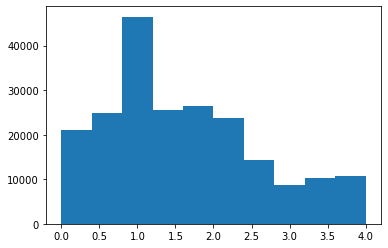

In [112]:
plt.hist(df_nooutliers['move_time'])

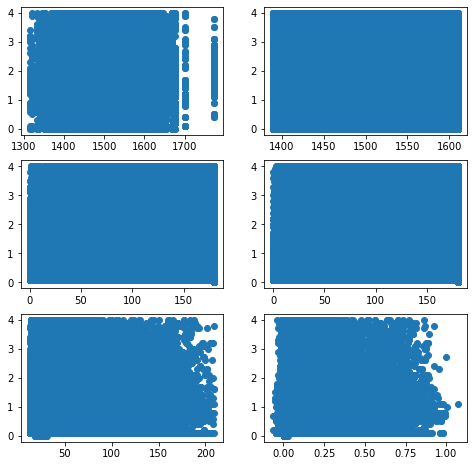

In [114]:
# Linearity: Create scatter plots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Plot the data on each subplot
axs[0, 0].scatter(df_nooutliers['white_elo'], df_nooutliers['move_time']) # almost no correlation between elo and move time.
axs[0, 1].scatter(df_nooutliers['black_elo'], df_nooutliers['move_time'])
axs[1, 0].scatter(df_nooutliers['white_time_left'], df_nooutliers['move_time']) # slight positive correlation (the more time left, the longer the move time.)
axs[1, 1].scatter(df_nooutliers['black_time_left'], df_nooutliers['move_time'])
axs[2, 0].scatter(df_nooutliers['expected_loss'], df_nooutliers['move_time']) # small negative correlation (higher expected loss correlates with shorter time.)
axs[2, 1].scatter(df_nooutliers['blunder_chance'], df_nooutliers['move_time'])



## Model

In [116]:
# Load packages
from sklearn.linear_model import Ridge, Lasso
lambda_ = 0.5
tau_ = 0.5

# Fit ridge regression
mod_ridge = Ridge(alpha = lambda_)
mod_ridge.fit(X_train, y_train)
y_ridge = mod_ridge.predict(X_test)

# Fit lasso regression
mod_lasso = Lasso(alpha = tau_)
mod_lasso.fit(X_train, y_train)
y_lasso = mod_lasso.predict(X_test)

## Assessing Model Fit

In [118]:
# Code goes here
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

print("MSE Ridge: %f" % mean_squared_error(y_test, y_ridge))
print("MSE Lasso: %f" % mean_squared_error(y_test, y_lasso))

print("R^2 Ridge: %f" % r2_score(y_test, y_ridge))
print("R^2 Lasso: %f" % r2_score(y_test, y_lasso))

df = pd.DataFrame({
                   "Ridge" : mod_ridge.coef_[0],
                   "Lasso" : mod_lasso.coef_})
df

MSE Ridge: 1.017990
MSE Lasso: 1.024638
R^2 Ridge: 0.006486
R^2 Lasso: -0.000002


,Ridge,Lasso
0,-18.441357,-0.0
1,-18.236250,-0.0
2,6.609388,0.0
3,-5.238369,0.0


## Check Model Conditions

In [119]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
#     predictions = model.predict(features)
#     df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
#     df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    predictions = mod_ridge.predict(X_train)
    df_results = pd.DataFrame({"Actual": list(y_train), "Predicted": list(predictions)})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

# source: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [120]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [121]:
print(df_results.min().min())
print(df_results.max().max())
df_results

-3.6117635380859237
102.7


,Actual,Predicted,Residuals
0,[1.2],[3.2607808418609743],[-2.060780841860974]
1,[1.4],[3.0610595166939554],[-1.6610595166939555]
2,[13.1],[3.1597140562608317],[9.940285943739168]
3,[1.6],[3.0503113320269892],[-1.4503113320269891]
4,[2.1],[3.2264165151723008],[-1.1264165151723007]
...,...,...,...
209423,[4.0],[3.0646696424496884],[0.9353303575503116]
209424,[0.8],[3.0743733578963637],[-2.274373357896364]
209425,[4.2],[3.1193668408025514],[1.0806331591974487]
209426,[0.0],[3.065666731676005],[-3.065666731676005]


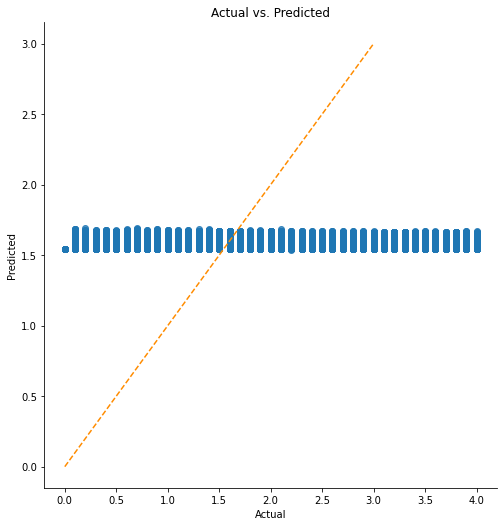

In [125]:
# df of residuals.
predictions = mod_ridge.predict(X_train)
df_results = pd.DataFrame({"Actual": list(y_train), "Predicted": list(predictions)})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
df_results

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7) # the actual vs. predicted values.

# Plotting the diagonal line
# line_coords = np.arange(df_results.min().min(), df_results.max().max())
line_coords = np.arange(0, 4)

plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show() # there is barely any predictive power in our variables.

In [98]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

In [ ]:
normal_errors_assumption(linear_model, linear_X, linear_y)

## CV

The idea behind $k$-fold cross-validation (CV) is to partition the data randomly into $k$ groups of data points. We then train on the remaining data, and compute the error on the left out goruop. We then do this across all of the elements in the partition, and average the error. This gives us an idea of the error associated to using a certain value for the penalty parameter $\lambda$. We can compute the CV error across different values of penalty parameters to choose a regression model.

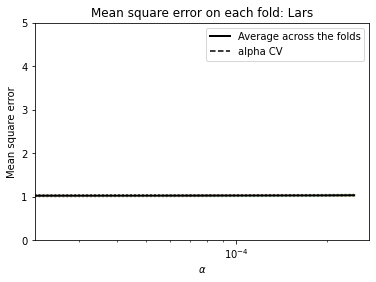

In [130]:
import warnings
warnings.filterwarnings('ignore')

### This code borrows from the following useful sklearn documentation: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py ###

# Load package
from sklearn.linear_model import LassoLarsCV
import matplotlib.pyplot as plt

# Run 10-fold CV
lasso = LassoLarsCV(cv=10).fit(X_train, y_train)

# Show CV path
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

ymin, ymax = 0, 5
plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars")